In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()

scores_df = pd.read_csv('../compas-analysis/compas-scores.csv')
raw_df = pd.read_csv('../compas-analysis/compas-scores-raw.csv')
twoyears_df = pd.read_csv('../compas-analysis/compas-scores-two-years.csv')
violent_df = pd.read_csv('../compas-analysis/compas-scores-two-years-violent.csv')


In [2]:
scores_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,num_r_cases,r_days_from_arrest,is_violent_recid,num_vr_cases,v_decile_score,decile_score.1
count,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,10577.000000,11015.000000,11757.000000,0.0,2460.000000,11757.000000,0.0,11757.000000,11757.000000
mean,5879.000000,35.143319,0.061580,4.371268,0.076040,0.093561,3.082164,-0.878037,63.587653,0.253806,NaN,20.410569,0.075019,NaN,3.571489,4.371268
std,3394.097892,12.022894,0.445328,2.877598,0.449757,0.472003,4.687410,72.889298,341.899711,0.558324,NaN,74.354840,0.263433,NaN,2.500479,2.877598
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,NaN,-1.000000,0.000000,NaN,-1.000000,-1.000000
25%,2940.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,1.000000,2.000000
50%,5879.000000,32.000000,0.000000,4.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,3.000000,4.000000
75%,8818.000000,43.000000,0.000000,7.000000,0.000000,0.000000,4.000000,-1.000000,2.000000,1.000000,NaN,1.000000,0.000000,NaN,5.000000,7.000000
max,11757.000000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,NaN,993.000000,1.000000,NaN,10.000000,10.000000


In [3]:
raw_df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0


In [4]:
twoyears_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [5]:
violent_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,...,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4475.000000,4732.000000,4743.000000,...,0.0,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
mean,5454.230445,36.002952,0.045330,3.978073,0.070841,0.080751,2.677209,2.723799,72.691251,0.209783,...,NaN,0.172676,3.978073,3.338815,2.677209,9.084124,730.143369,0.165507,0.163399,0.163399
std,3189.515451,12.200715,0.420694,2.749706,0.406142,0.468779,4.084277,78.074361,385.694476,0.407196,...,NaN,0.378006,2.749706,2.415791,4.084277,36.867544,365.435158,0.371677,0.369768,0.369768
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-345.000000,0.000000,0.000000,...,NaN,0.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2631.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,...,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,422.500000,0.000000,0.000000,0.000000
50%,5475.000000,33.000000,0.000000,3.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,...,NaN,0.000000,3.000000,3.000000,1.000000,0.000000,837.000000,0.000000,0.000000,0.000000
75%,8239.500000,44.000000,0.000000,6.000000,0.000000,0.000000,3.000000,-1.000000,2.000000,0.000000,...,NaN,0.000000,6.000000,5.000000,3.000000,1.000000,1039.000000,0.000000,0.000000,0.000000
max,11000.000000,83.000000,20.000000,10.000000,8.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,...,NaN,1.000000,10.000000,10.000000,38.000000,672.000000,1186.000000,1.000000,1.000000,1.000000


In [6]:
print(scores_df.columns)
print(raw_df.columns)
print(twoyears_df.columns)
print(violent_df.columns)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'num_r_cases',
       'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'type_of_assessment', 'decile_score.1',
       'score_text', 'screening_date'],
      dtype='object')
Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic

In [7]:
twoyears_df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


### Selected variables

In [8]:
all_variables = ['sex', 'age', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_charge_degree', 'is_recid',
       'is_violent_recid', 'score_text', 'v_decile_score', 'v_score_text', 'two_year_recid']

pred_vars = [
    'sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
    'juv_other_count', 'priors_count', 'c_charge_degree']

### Preprocessing

* Filtering only selected variables
* Removing rows with invalid recidivism value and a minor offense
* Selecting only cases of Caucasian and African-American people
* Creating dummy variables for categorical measures
* Splitting data into training and test sets

In [9]:
np.random.seed(42)

df = twoyears_df[all_variables]
df = df[(df.is_recid != -1) & (df.c_charge_degree != 'O')]

df = df[(df.race == 'Caucasian') | (df.race == 'African-American')]


pred_df = df.filter(items=pred_vars)
pred_df = pd.get_dummies(pred_df, drop_first=True, dtype='int32')

response = df.two_year_recid

X_train, X_test, y_train, y_test = train_test_split(pred_df, response, test_size=0.5)


### Distributions of recidivism among protected groups

In [10]:
pd.DataFrame({'Male_Recid': [
    np.sum(response[(pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 1)]),
    np.sum(response[(pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 0)]),
    np.sum(response[pred_df.sex_Male == 1])
], 'Male_total': [
    np.sum((pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 1)),
    np.sum((pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 0)),
    np.sum(pred_df.sex_Male == 1)
], 'Female_recid': [
    np.sum(response[(pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 1)]),
    np.sum(response[(pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 0)]),
    np.sum(response[pred_df.sex_Male == 0])
], 'Female_total': [
    np.sum((pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 1)),
    np.sum((pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 0)),
    np.sum(pred_df.sex_Male == 0)
], 'Total_recid': [
    np.sum(response[pred_df.race_Caucasian == 1]),
    np.sum(response[pred_df.race_Caucasian == 0]),
    np.sum(response)
], 'Total_total': [
    np.sum(pred_df.race_Caucasian == 1),
    np.sum(pred_df.race_Caucasian == 0),
    pred_df.shape[0]
]}, index=['Caucasian', 'African-American', 'Total'])


,Male_Recid,Male_total,Female_recid,Female_total,Total_recid,Total_total
Caucasian,767,1887,199,567,966,2454
African-American,1654,3044,247,652,1901,3696
Total,2421,4931,446,1219,2867,6150


In [92]:
joint_probs = pred_df.assign(is_recid=response).groupby(
    by=['sex_Male', 'race_Caucasian', 'is_recid']
).size() / pred_df.shape[0]
joint_probs = joint_probs.reset_index().rename(columns={0: 'prob'})
joint_probs

,sex_Male,race_Caucasian,is_recid,prob
0,0,0,0,0.065854
1,0,0,1,0.040163
2,0,1,0,0.059837
3,0,1,1,0.032358
4,1,0,0,0.226016
5,1,0,1,0.268943
6,1,1,0,0.182114
7,1,1,1,0.124715


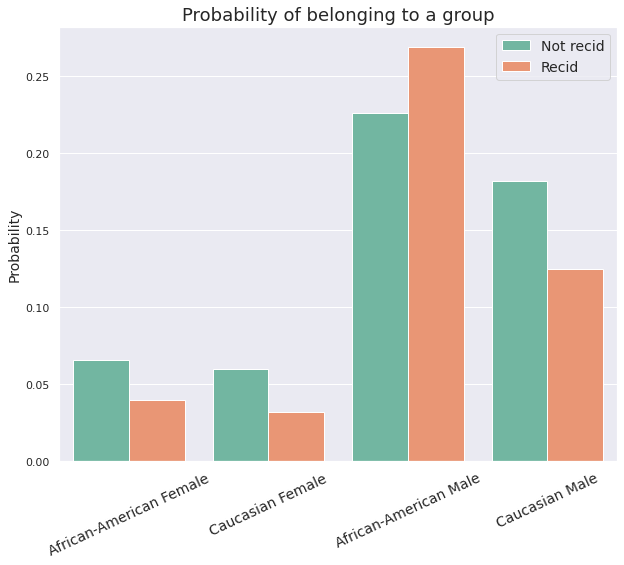

In [94]:
th_df = joint_probs.assign(
    Group=np.repeat(['African-American Female', 'Caucasian Female', 'African-American Male', 'Caucasian Male'], 2)
)

th_df = th_df.assign(Recid=th_df.is_recid.apply(lambda x: 'Recid' if x == 1 else 'Not recid'))


plt.figure(figsize=(10, 8))
sns.barplot(x="Group", 
            y="prob", 
            hue="Recid", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Probability", size=14)
plt.xlabel('')
plt.xticks(fontsize=14, rotation=25)
plt.legend(fontsize=14)
plt.title("Probability of belonging to a group", size=18)

plt.show()

<AxesSubplot:>

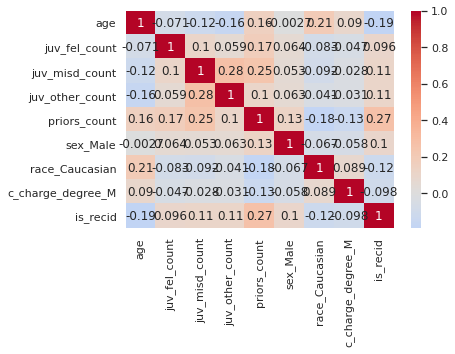

In [12]:
cor_df = pred_df.assign(is_recid=response)
corr = cor_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

### Training logistic regression and random forest without fairness constraints

In [13]:
clf = RFC()
clf.fit(X_train, y_train)

print('Accuracy', clf.score(X_test, y_test))

def get_idx(df, male, caucasian):
    return (df.sex_Male == male) & (df.race_Caucasian == caucasian)

def get_idx_race(df, male, caucasian):
    return (df.race_Caucasian == caucasian)


def get_thorndike(male, caucasian, model, x=X_test, y=y_test, idx_f=get_idx):
    y = y[idx_f(x, male, caucasian)]
    x = x[idx_f(x, male, caucasian)]

    tn, fp, fn, tp = confusion_matrix(y, model.predict(x)).ravel()

    return (tp + fp) / (tp + fn)



afram_male_th = get_thorndike(1, 0, clf)
afram_female_th = get_thorndike(0, 0, clf)
cauc_male_th = get_thorndike(1, 1, clf)
cauc_female_th = get_thorndike(0, 1, clf)

afram_th = get_thorndike(1, 0, clf, idx_f=get_idx_race)
cauc_th = get_thorndike(1, 1, clf, idx_f=get_idx_race)

print(afram_male_th, afram_female_th, cauc_male_th, cauc_female_th)
print(afram_th, cauc_th)

Accuracy 0.6117073170731707
1.0313253012048194 1.0655737704918034 0.9411764705882353 1.10989010989011
1.0357142857142858 0.9741935483870968


In [14]:
lg = LR()
lg.fit(X_train, y_train)

print('Accuracy', lg.score(X_test, y_test))

def get_idx(df, male, caucasian):
    return (df.sex_Male == male) & (df.race_Caucasian == caucasian)


def get_idx_race(df, male, caucasian):
    return (df.race_Caucasian == caucasian)


def get_idx_sex(df, male, caucasian):
    return df.sex_Male == male


def get_all_scores(male, caucasian, model, x=X_test, y=y_test, idx_f=get_idx):
    y = y[idx_f(x, male, caucasian)]
    x = x[idx_f(x, male, caucasian)]

    tn, fp, fn, tp = confusion_matrix(y, model.predict(x)).ravel()

    return {
        'Thorndike': (tp + fp) / (tp + fn), 'FPR': fp / (fp + tn),
        'TPR': tp / (tp + fn), 'FNR': fn / (fn + tp), 'TNR': tn / (tn + fp),
        'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
    }


def get_all(model):
    afram_male = get_all_scores(1, 0, lg)
    afram_female = get_all_scores(0, 0, lg)
    cauc_male = get_all_scores(1, 1, lg)
    cauc_female = get_all_scores(0, 1, lg)

    afram = get_all_scores(1, 0, model, idx_f=get_idx_race)
    cauc = get_all_scores(1, 1, model, idx_f=get_idx_race)

    male = get_all_scores(1, 0, model, idx_f=get_idx_sex)
    female = get_all_scores(0, 1, model, idx_f=get_idx_sex)

    return (
        pd.DataFrame([afram_male, afram_female, cauc_male, cauc_female],
                     index=['AfrAm_Male', 'AfrAm_Female', 'Cauc_Male', 'Cauc_Female']),
        pd.DataFrame([afram, cauc], index=['AfrAm', 'Cauc']),
        pd.DataFrame([male, female], index=['Male', 'Female'])
    )


both, race, sex = get_all(lg)

both

Accuracy 0.6640650406504065


,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,1.127711,0.434965,0.753012,0.246988,0.565035,1.497600,1.507426
AfrAm_Female,0.729508,0.185567,0.434426,0.565574,0.814433,1.679245,1.436709
Cauc_Male,0.762032,0.208406,0.443850,0.556150,0.791594,1.716867,1.460177
Cauc_Female,0.351648,0.073034,0.208791,0.791209,0.926966,1.684211,1.436364


In [15]:
baseline = both[['Thorndike', 'FPR', 'FNR']]
baseline

,Thorndike,FPR,FNR
AfrAm_Male,1.127711,0.434965,0.246988
AfrAm_Female,0.729508,0.185567,0.565574
Cauc_Male,0.762032,0.208406,0.556150
Cauc_Female,0.351648,0.073034,0.791209


In [59]:
baseline.reset_index()

,index,Thorndike,FPR,FNR
0,AfrAm_Male,1.127711,0.434965,0.246988
1,AfrAm_Female,0.729508,0.185567,0.565574
2,Cauc_Male,0.762032,0.208406,0.556150
3,Cauc_Female,0.351648,0.073034,0.791209


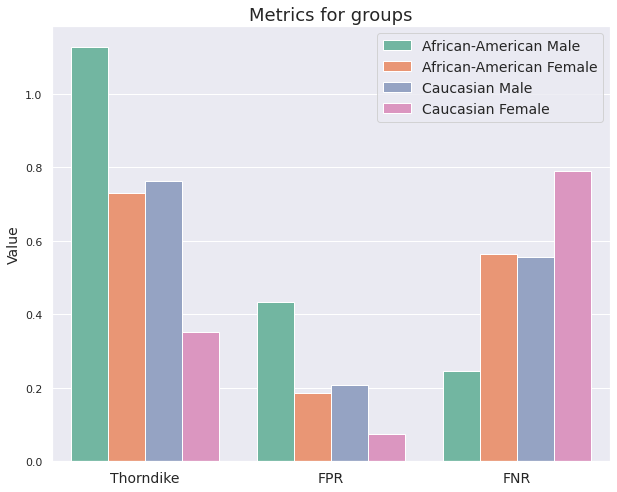

In [63]:
th_df = baseline.assign(Group=[
    'African-American Male', 'African-American Female', 'Caucasian Male', 'Caucasian Female'
]).melt(id_vars=['Group'], value_vars=['Thorndike', 'FPR', 'FNR'])


plt.figure(figsize=(10, 8))
sns.barplot(x="variable", 
            y="value", 
            hue="Group", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Value", size=14)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.legend(fontsize=14)
plt.title("Metrics for groups", size=18)

plt.show()

In [16]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,1.076681,0.381738,0.712185,0.287815,0.618262,1.511799,1.487544
Cauc,0.681720,0.176235,0.397849,0.602151,0.823765,1.713514,1.453809


In [17]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,1.014120,0.33437,0.656977,0.343023,0.66563,1.543616,1.482477
Female,0.568075,0.13172,0.338028,0.661972,0.86828,1.680556,1.436533


#### Logistic regression coefficients

In [18]:
pd.DataFrame(lg.coef_, columns=pred_df.columns)

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,sex_Male,race_Caucasian,c_charge_degree_M
0,-0.048644,0.183925,-0.032371,0.092444,0.147573,0.266401,-0.006768,-0.216846


Selection bias

In [19]:
lg.coef_

array([[-0.04864408,  0.18392522, -0.03237128,  0.0924441 ,  0.14757348,
         0.26640099, -0.00676844, -0.21684615]])

### After correction by removing coefficients for protected variables

In [20]:
lg.coef_[0, 5:7] = np.zeros(2)

print('Accuracy', lg.score(X_test, y_test))

both, race, sex = get_all(lg)

both

Accuracy 0.6617886178861788


,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.751807,0.236364,0.548193,0.451807,0.763636,1.371429,1.686813
AfrAm_Female,0.729508,0.185567,0.434426,0.565574,0.814433,1.679245,1.436709
Cauc_Male,0.494652,0.099825,0.342246,0.657754,0.900175,1.445312,1.478599
Cauc_Female,0.384615,0.089888,0.208791,0.791209,0.910112,1.842105,1.444444


In [21]:
post_processing = both[['Thorndike', 'FPR', 'FNR']]
post_processing

,Thorndike,FPR,FNR
AfrAm_Male,0.751807,0.236364,0.451807
AfrAm_Female,0.729508,0.185567,0.565574
Cauc_Male,0.494652,0.099825,0.657754
Cauc_Female,0.384615,0.089888,0.791209


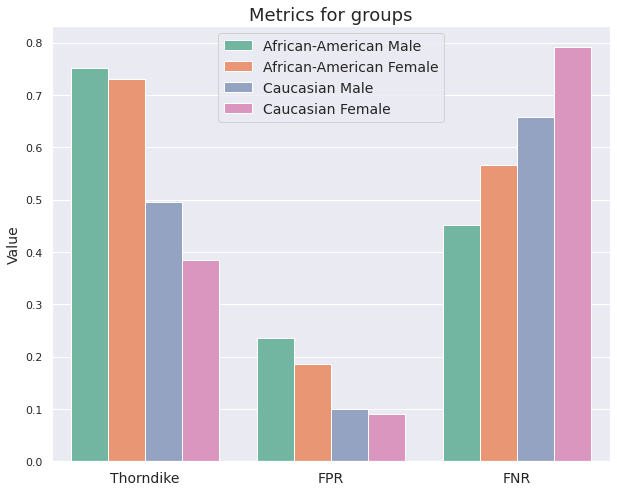

In [64]:
th_df = post_processing.assign(Group=[
    'African-American Male', 'African-American Female', 'Caucasian Male', 'Caucasian Female'
]).melt(id_vars=['Group'], value_vars=['Thorndike', 'FPR', 'FNR'])


plt.figure(figsize=(10, 8))
sns.barplot(x="variable", 
            y="value", 
            hue="Group", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Value", size=14)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.legend(fontsize=14)
plt.title("Metrics for groups", size=18)

plt.show()

In [22]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.748950,0.225523,0.533613,0.466387,0.774477,1.403543,1.630682
Cauc,0.473118,0.097463,0.316129,0.683871,0.902537,1.496599,1.470414


In [23]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.671927,0.175739,0.484219,0.515781,0.824261,1.387650,1.585849
Female,0.582160,0.139785,0.338028,0.661972,0.860215,1.722222,1.440625


In [24]:
lg.coef_[0, 0] = 0

print('Accuracy', lg.score(X_test, y_test))

both, race, sex = get_all(lg)

both

Accuracy 0.4608130081300813


<ipython-input-14-e8551f7eb073>:27: RuntimeWarning: invalid value encountered in long_scalars
  'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
<ipython-input-14-e8551f7eb073>:27: RuntimeWarning: invalid value encountered in long_scalars
  'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
<ipython-input-14-e8551f7eb073>:27: RuntimeWarning: invalid value encountered in long_scalars
  'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
<ipython-input-14-e8551f7eb073>:27: RuntimeWarning: invalid value encountered in long_scalars
  'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
<ipython-input-14-e8551f7eb073>:27: RuntimeWarning: invalid value encountered in long_scalars
  'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
<ipython-input-14-e8551f7eb073>:27: RuntimeWarning: invalid value encountered in long_scalars
  'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
<ipython-input-14-e8551f7eb073>:27: RuntimeWar

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,1.861446,1.0,1.0,0.0,0.0,1.861446,NaN
AfrAm_Female,2.590164,1.0,1.0,0.0,0.0,2.590164,NaN
Cauc_Male,2.526738,1.0,1.0,0.0,0.0,2.526738,NaN
Cauc_Female,2.956044,1.0,1.0,0.0,0.0,2.956044,NaN


In [25]:
lg.coef_

array([[ 0.        ,  0.18392522, -0.03237128,  0.0924441 ,  0.14757348,
         0.        ,  0.        , -0.21684615]])

Accuracy does not change much, but the two sexes seem to be treated more equally, although the computed values are still not constant for the two. On the other hand, the difference between the fairness for the two races remains quite large. One possible explanation is that we didn't manage to remove the coefficients for all variables correlating with both race and degree of recidivism. However, none of the selected variables correlated highly with each other, so there may be some left out confounders that skew the results against African Americans. 

### After training model with fairness constraints

Sources:

Muhammad Bilal Zafar, Isabel Valera, Manuel Gomez Rodriguez, Krishna P. Gummadi. _Fairness Beyond Disparate Treatment & Disparate Impact: Learning Classification without Disparate Mistreatment_. 26th International World Wide Web Conference (WWW), Perth, Australia, April 2017.

Code:

https://github.com/mbilalzafar/fair-classification

In [26]:
from fair_classification import funcs_disp_mist as fdm


In [27]:
sensitive_attrs = np.array(['race_Caucasian'])

x_control_train = X_train[sensitive_attrs]
x_control_test = X_test[sensitive_attrs]

x_train = X_train.drop(columns=['race_Caucasian', 'sex_Male']).to_numpy()
x_test = X_test.drop(columns=['race_Caucasian', 'sex_Male']).to_numpy()

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1


cons_params = None
loss_function = "logreg" # perform the experiments with logistic regression
EPS = 1e-6


def train_test_classifier():
    w = fdm.train_model_disp_mist(x_train, y_train, x_control_train, loss_function, EPS, cons_params)

    tr_score, te_score, cov_train, cov_test, s_fp_fn_train, s_fp_fn_test, tr_labels, te_labels = (
        fdm.get_clf_stats(w, x_train, y_train, x_control_train, x_test, y_test, x_control_test, sensitive_attrs)
    )

    return w, te_labels


def get_all_scores(male, caucasian, predicted_labels, x=X_test, y=y_test, idx_f=get_idx):
    idx = idx_f(x, male, caucasian)
    y = y[idx]
    preds = predicted_labels[idx]

    tp = np.sum((y == 1) & (preds == 1))
    tn = np.sum((y == -1) & (preds == -1))
    fp = np.sum((y == -1) & (preds == 1))
    fn = np.sum((y == 1) & (preds == -1))

    return {
        'Thorndike': (tp + fp) / (tp + fn), 'FPR': fp / (fp + tn),
        'TPR': tp / (tp + fn), 'FNR': fn / (fn + tp), 'TNR': tn / (tn + fp),
        'Sufficiency1': (tp + fp) / tp, 'Sufficiency2': (tn + fn) / tn
    }


def get_all(preds):
    afram_male = get_all_scores(1, 0, preds)
    afram_female = get_all_scores(0, 0, preds)
    cauc_male = get_all_scores(1, 1, preds)
    cauc_female = get_all_scores(0, 1, preds)

    afram = get_all_scores(1, 0, preds, idx_f=get_idx_race)
    cauc = get_all_scores(1, 1, preds, idx_f=get_idx_race)

    male = get_all_scores(1, 0, preds, idx_f=get_idx_sex)
    female = get_all_scores(0, 1, preds, idx_f=get_idx_sex)

    return (
        pd.DataFrame([afram_male, afram_female, cauc_male, cauc_female],
                     index=['AfrAm_Male', 'AfrAm_Female', 'Cauc_Male', 'Cauc_Female']),
        pd.DataFrame([afram, cauc], index=['AfrAm', 'Cauc']),
        pd.DataFrame([male, female], index=['Male', 'Female'])
    )

print("== Unconstrained (original) classifier ==")
w_uncons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both

== Unconstrained (original) classifier ==


Accuracy: 0.654
||  s  || FPR. || FNR. ||
||  0  || 0.21 || 0.51 ||
||  1  || 0.09 || 0.70 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.712048,0.229371,0.514458,0.485542,0.770629,1.384075,1.731397
AfrAm_Female,0.557377,0.134021,0.344262,0.655738,0.865979,1.619048,1.476190
Cauc_Male,0.467914,0.098074,0.318182,0.681818,0.901926,1.470588,1.495146
Cauc_Female,0.373626,0.067416,0.241758,0.758242,0.932584,1.545455,1.415663


In [28]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.692227,0.209021,0.492647,0.507353,0.790979,1.405117,1.671766
Cauc,0.449462,0.090788,0.303226,0.696774,0.909212,1.482270,1.475771


In [29]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.636213,0.171073,0.453488,0.546512,0.828927,1.40293,1.617261
Female,0.478873,0.102151,0.300469,0.699531,0.897849,1.59375,1.446108


In [30]:
print("\n\n== Constraints on FPR ==") # setting parameter for constraints
cons_type = 1 # FPR constraint -- just change the cons_type, the rest of parameters should stay the same
tau = 1.0
mu = 1.2
sensitive_attrs_to_cov_thresh = {"race_Caucasian": {0:{0:0, 1:0}, 1:{0:0, 1:0}, 2:{0:0, 1:0}}}
cons_params = {"cons_type": cons_type, 
                "tau": tau, 
                "mu": mu, 
                "sensitive_attrs_to_cov_thresh": sensitive_attrs_to_cov_thresh}

w_cons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both



== Constraints on FPR ==


Accuracy: 0.599
||  s  || FPR. || FNR. ||
||  0  || 0.08 || 0.77 ||
||  1  || 0.04 || 0.86 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.326506,0.086713,0.251807,0.748193,0.913287,1.296651,1.950995
AfrAm_Female,0.163934,0.036082,0.106557,0.893443,0.963918,1.538462,1.582888
Cauc_Male,0.205882,0.036778,0.149733,0.850267,0.963222,1.375000,1.578182
Cauc_Female,0.186813,0.056180,0.076923,0.923077,0.943820,2.428571,1.500000


In [31]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.305672,0.075908,0.233193,0.766807,0.924092,1.310811,1.869048
Cauc,0.202151,0.041389,0.135484,0.864516,0.958611,1.492063,1.559889


In [32]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.289037,0.064541,0.220100,0.779900,0.935459,1.313208,1.780549
Female,0.173709,0.045699,0.093897,0.906103,0.954301,1.850000,1.543662


In [33]:
print("\n\n== Constraints on FNR ==") # setting parameter for constraints
cons_params['cons_type'] = 2
w_cons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both



== Constraints on FNR ==


Accuracy: 0.572
||  s  || FPR. || FNR. ||
||  0  || 0.70 || 0.16 ||
||  1  || 0.58 || 0.21 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,1.471084,0.713287,0.856627,0.143373,0.286713,1.717300,1.580488
AfrAm_Female,1.786885,0.649485,0.754098,0.245902,0.350515,2.369565,1.441176
Cauc_Male,1.732620,0.611208,0.799465,0.200535,0.388792,2.167224,1.337838
Cauc_Female,1.692308,0.477528,0.758242,0.241758,0.522472,2.231884,1.236559


In [34]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,1.511555,0.699670,0.843487,0.156513,0.300330,1.792030,1.545788
Cauc,1.724731,0.579439,0.791398,0.208602,0.420561,2.179348,1.307937


In [35]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,1.552326,0.667963,0.838870,0.161130,0.332037,1.850495,1.454333
Female,1.746479,0.567204,0.755869,0.244131,0.432796,2.310559,1.322981


In [36]:
print("\n\n== Constraints on FPR and FNR ==") # setting parameter for constraints
cons_params['cons_type'] = 4
w_cons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both



== Constraints on FPR and FNR ==


Accuracy: 0.656
||  s  || FPR. || FNR. ||
||  0  || 0.28 || 0.43 ||
||  1  || 0.14 || 0.63 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.853012,0.302098,0.592771,0.407229,0.697902,1.439024,1.677355
AfrAm_Female,0.721311,0.190722,0.418033,0.581967,0.809278,1.725490,1.452229
Cauc_Male,0.609626,0.145359,0.387701,0.612299,0.854641,1.572414,1.469262
Cauc_Female,0.494505,0.106742,0.285714,0.714286,0.893258,1.730769,1.408805


In [37]:
in_race = both[['Thorndike', 'FPR', 'FNR']]
in_race

,Thorndike,FPR,FNR
AfrAm_Male,0.853012,0.302098,0.407229
AfrAm_Female,0.721311,0.190722,0.581967
Cauc_Male,0.609626,0.145359,0.612299
Cauc_Female,0.494505,0.106742,0.714286


In [38]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.836134,0.278328,0.570378,0.429622,0.721672,1.465930,1.623476
Cauc,0.587097,0.136182,0.367742,0.632258,0.863818,1.596491,1.454405


In [39]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.777409,0.232504,0.529070,0.470930,0.767496,1.469388,1.574468
Female,0.624413,0.150538,0.361502,0.638498,0.849462,1.727273,1.430380


In [40]:
sensitive_attrs = np.array(['race_Caucasian'])

x_control_train = X_train[sensitive_attrs]
x_control_test = X_test[sensitive_attrs]

x_train = X_train.drop(columns=['race_Caucasian']).to_numpy()
x_test = X_test.drop(columns=['race_Caucasian']).to_numpy()

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1


cons_params = None
loss_function = "logreg" # perform the experiments with logistic regression
EPS = 1e-6

cons_type = 4
tau = 1.0
mu = 1.2
sensitive_attrs_to_cov_thresh = {"race_Caucasian": {0:{0:0, 1:0}, 1:{0:0, 1:0}, 2:{0:0, 1:0}}}
cons_params = {"cons_type": cons_type, 
                "tau": tau, 
                "mu": mu, 
                "sensitive_attrs_to_cov_thresh": sensitive_attrs_to_cov_thresh}

def train_test_classifier():
    w = fdm.train_model_disp_mist(x_train, y_train, x_control_train, loss_function, EPS, cons_params)
    
    print(w)
    w[5] = 0
    print(w)

    tr_score, te_score, cov_train, cov_test, s_fp_fn_train, s_fp_fn_test, tr_labels, te_labels = (
        fdm.get_clf_stats(w, x_train, y_train, x_control_train, x_test, y_test, x_control_test, sensitive_attrs)
    )

    return w, te_labels


print("\n\n== Constraints on FPR and FNR, removing coefficient for sex ==")

w_cons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both



== Constraints on FPR and FNR, removing coefficient for sex ==
[-2.60293165e-09  1.30442337e-01 -1.90245539e-08  4.61363316e-01
  1.72977936e-08  4.40744332e-08 -2.99164828e-08]
[-2.60293165e-09  1.30442337e-01 -1.90245539e-08  4.61363316e-01
  1.72977936e-08  0.00000000e+00 -2.99164828e-08]


Accuracy: 0.651
||  s  || FPR. || FNR. ||
||  0  || 0.21 || 0.51 ||
||  1  || 0.09 || 0.71 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.707229,0.230769,0.508434,0.491566,0.769231,1.390995,1.741818
AfrAm_Female,0.540984,0.118557,0.352459,0.647541,0.881443,1.534884,1.461988
Cauc_Male,0.454545,0.092820,0.312834,0.687166,0.907180,1.452991,1.496139
Cauc_Female,0.373626,0.084270,0.208791,0.791209,0.915730,1.789474,1.441718


In [41]:
in_race_post_sex = both[['Thorndike', 'FPR', 'FNR']]
in_race_post_sex

,Thorndike,FPR,FNR
AfrAm_Male,0.707229,0.230769,0.491566
AfrAm_Female,0.540984,0.118557,0.647541
Cauc_Male,0.454545,0.092820,0.687166
Cauc_Female,0.373626,0.084270,0.791209


In [42]:
import cvxpy as cvx


sensitive_attrs = np.array(['sex_Male'])

x_control_train = X_train[sensitive_attrs]
x_control_test = X_test[sensitive_attrs]

x_train = X_train.drop(columns=['race_Caucasian', 'sex_Male']).to_numpy()
x_test = X_test.drop(columns=['race_Caucasian', 'sex_Male']).to_numpy()

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1


cons_params = None
loss_function = "logreg" # perform the experiments with logistic regression
EPS = 1e-6


def train_test_classifier():
    w = fdm.train_model_disp_mist(x_train, y_train, x_control_train, loss_function, EPS, cons_params)

    tr_score, te_score, cov_train, cov_test, s_fp_fn_train, s_fp_fn_test, tr_labels, te_labels = (
        fdm.get_clf_stats(w, x_train, y_train, x_control_train, x_test, y_test, x_control_test, sensitive_attrs)
    )

    return w, te_labels

print("== Unconstrained (original) classifier ==")
w_uncons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both

== Unconstrained (original) classifier ==


Accuracy: 0.654
||  s  || FPR. || FNR. ||
||  0  || 0.10 || 0.70 ||
||  1  || 0.17 || 0.55 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.712048,0.229371,0.514458,0.485542,0.770629,1.384075,1.731397
AfrAm_Female,0.557377,0.134021,0.344262,0.655738,0.865979,1.619048,1.476190
Cauc_Male,0.467914,0.098074,0.318182,0.681818,0.901926,1.470588,1.495146
Cauc_Female,0.373626,0.067416,0.241758,0.758242,0.932584,1.545455,1.415663


In [43]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.692227,0.209021,0.492647,0.507353,0.790979,1.405117,1.671766
Cauc,0.449462,0.090788,0.303226,0.696774,0.909212,1.482270,1.475771


In [44]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.636213,0.171073,0.453488,0.546512,0.828927,1.40293,1.617261
Female,0.478873,0.102151,0.300469,0.699531,0.897849,1.59375,1.446108


In [45]:
print("\n\n== Constraints on FPR ==") # setting parameter for constraints
cons_type = 1 # FPR constraint -- just change the cons_type, the rest of parameters should stay the same
tau = 5.0
mu = 1.2
sensitive_attrs_to_cov_thresh = {"sex_Male": {0:{0:0, 1:0}, 1:{0:0, 1:0}, 2:{0:0, 1:0}}}
cons_params = {"cons_type": cons_type, 
                "tau": tau, 
                "mu": mu, 
                "sensitive_attrs_to_cov_thresh": sensitive_attrs_to_cov_thresh}

w_cons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both



== Constraints on FPR ==


Accuracy: 0.553
||  s  || FPR. || FNR. ||
||  0  || 0.00 || 0.99 ||
||  1  || 0.01 || 0.96 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.071084,0.015385,0.057831,0.942169,0.984615,1.229167,2.110795
AfrAm_Female,0.008197,0.000000,0.008197,0.991803,1.000000,1.000000,1.623711
Cauc_Male,0.013369,0.000000,0.013369,0.986631,1.000000,1.000000,1.646235
Cauc_Female,0.010989,0.000000,0.010989,0.989011,1.000000,1.000000,1.505618


In [46]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.063025,0.012101,0.051471,0.948529,0.987899,1.22449,2.005568
Cauc,0.012903,0.000000,0.012903,0.987097,1.000000,1.00000,1.612817


In [47]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.053156,0.008554,0.04402,0.95598,0.991446,1.207547,1.902745
Female,0.009390,0.000000,0.00939,0.99061,1.000000,1.000000,1.567204


In [48]:
print("\n\n== Constraints on FNR ==") # setting parameter for constraints
cons_params['cons_type'] = 2
w_cons, te_labels = train_test_classifier()
both, race, sex = get_all(te_labels)

both



== Constraints on FNR ==


Accuracy: 0.649
||  s  || FPR. || FNR. ||
||  0  || 0.18 || 0.60 ||
||  1  || 0.25 || 0.47 ||




,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm_Male,0.865060,0.325874,0.584337,0.415663,0.674126,1.480412,1.715768
AfrAm_Female,0.852459,0.262887,0.434426,0.565574,0.737113,1.962264,1.482517
Cauc_Male,0.641711,0.152364,0.409091,0.590909,0.847636,1.568627,1.456612
Cauc_Female,0.538462,0.089888,0.362637,0.637363,0.910112,1.484848,1.358025


In [49]:
in_sex = both[['Thorndike', 'FPR', 'FNR']]
in_sex

,Thorndike,FPR,FNR
AfrAm_Male,0.865060,0.325874,0.415663
AfrAm_Female,0.852459,0.262887,0.565574
Cauc_Male,0.641711,0.152364,0.590909
Cauc_Female,0.538462,0.089888,0.637363


In [50]:
race

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
AfrAm,0.863445,0.312431,0.565126,0.434874,0.687569,1.527881,1.662400
Cauc,0.621505,0.137517,0.400000,0.600000,0.862483,1.553763,1.431889


In [51]:
sex

,Thorndike,FPR,TPR,FNR,TNR,Sufficiency1,Sufficiency2
Male,0.795681,0.248834,0.529900,0.470100,0.751166,1.501567,1.585921
Female,0.718310,0.180108,0.403756,0.596244,0.819892,1.779070,1.416393


In [52]:
# print("\n\n== Constraints on FPR and FNR ==") # setting parameter for constraints
# cons_params['cons_type'] = 4
# w_cons, te_labels = train_test_classifier(None)
# both, race, sex = get_all(te_labels)

# both

In [53]:
# race

In [54]:
# sex

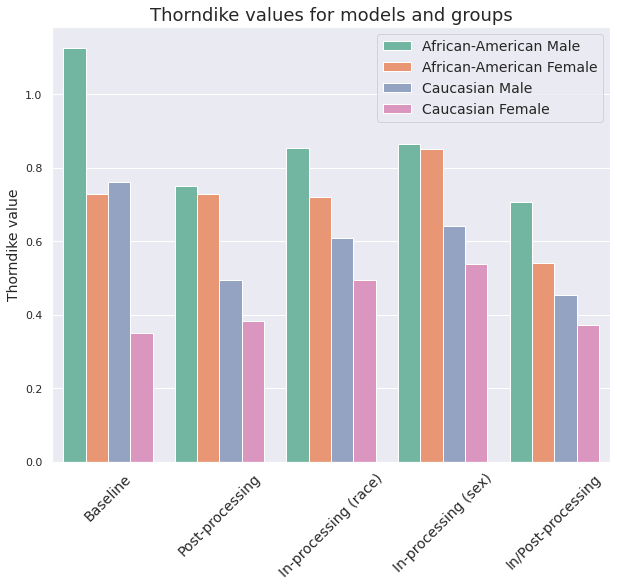

In [58]:
th_df = pd.DataFrame({'Group': ['African-American Male', 'African-American Female', 'Caucasian Male', 'Caucasian Female'],
                      'Baseline': baseline.Thorndike, 'Post-processing': post_processing.Thorndike,
                      'In-processing (race)': in_race.Thorndike, 'In-processing (sex)': in_sex.Thorndike,
                      'In/Post-processing': in_race_post_sex.Thorndike
                     }).melt(id_vars=['Group'],
                           value_vars=['Baseline', 'Post-processing',
                                       'In-processing (race)', 'In-processing (sex)', 'In/Post-processing'])


plt.figure(figsize=(10, 8))
sns.barplot(x="variable", 
            y="value", 
            hue="Group", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Thorndike value", size=14)
plt.xlabel('')
plt.xticks(fontsize=14, rotation=45)
plt.legend(fontsize=14)
plt.title("Thorndike values for models and groups", size=18)
# plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")

plt.show()

For us, Thorndike values of less than 1 are better, because there is no chance of 0 FNs and 0 FPs. All in all, we aim for lower FPR rather than lower FNR.

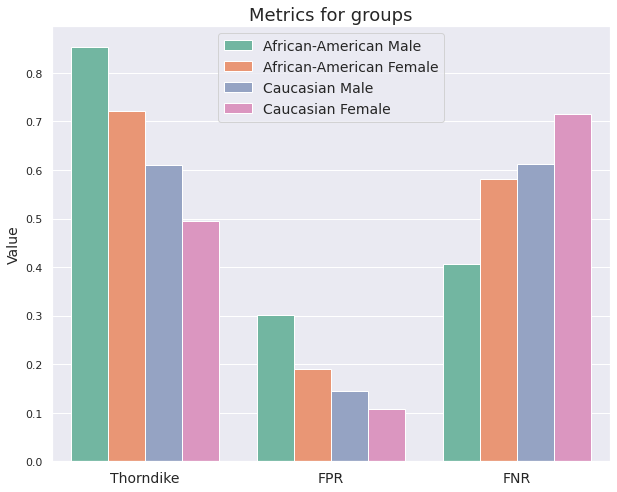

In [65]:
th_df = in_race.assign(Group=[
    'African-American Male', 'African-American Female', 'Caucasian Male', 'Caucasian Female'
]).melt(id_vars=['Group'], value_vars=['Thorndike', 'FPR', 'FNR'])


plt.figure(figsize=(10, 8))
sns.barplot(x="variable", 
            y="value", 
            hue="Group", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Value", size=14)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.legend(fontsize=14)
plt.title("Metrics for groups", size=18)

plt.show()

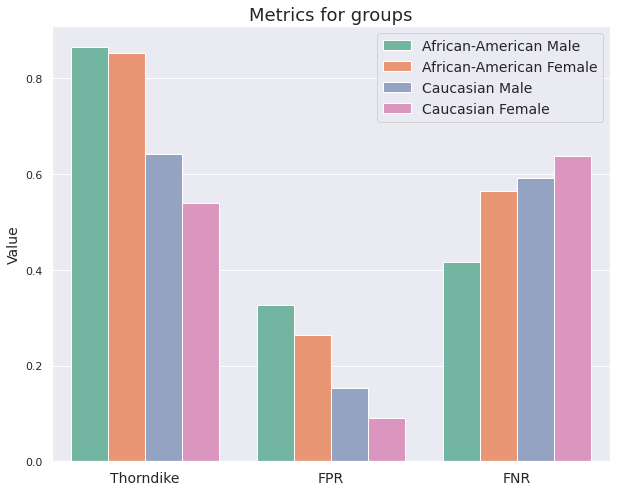

In [66]:
th_df = in_sex.assign(Group=[
    'African-American Male', 'African-American Female', 'Caucasian Male', 'Caucasian Female'
]).melt(id_vars=['Group'], value_vars=['Thorndike', 'FPR', 'FNR'])


plt.figure(figsize=(10, 8))
sns.barplot(x="variable", 
            y="value", 
            hue="Group", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Value", size=14)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.legend(fontsize=14)
plt.title("Metrics for groups", size=18)

plt.show()

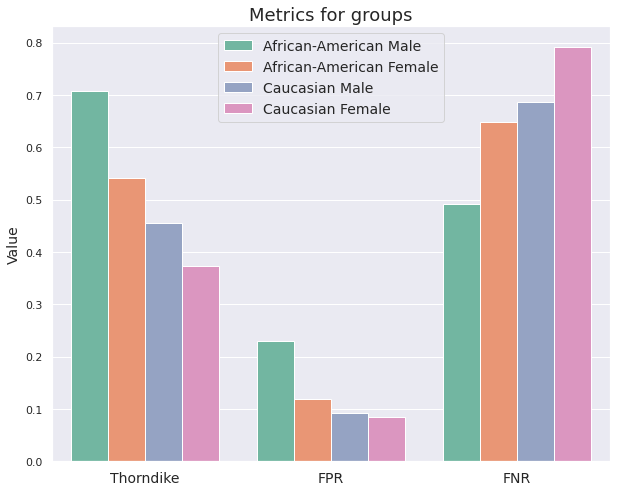

In [67]:
th_df = in_race_post_sex.assign(Group=[
    'African-American Male', 'African-American Female', 'Caucasian Male', 'Caucasian Female'
]).melt(id_vars=['Group'], value_vars=['Thorndike', 'FPR', 'FNR'])


plt.figure(figsize=(10, 8))
sns.barplot(x="variable", 
            y="value", 
            hue="Group", 
            data=th_df,
            palette='Set2'
           )
plt.ylabel("Value", size=14)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.legend(fontsize=14)
plt.title("Metrics for groups", size=18)

plt.show()